In [37]:
set_verbose(-2)

In [19]:
set_verbose(2)

In [2]:
E = EllipticCurve("389.a1")
print E
L = E.lseries().dokchitser(algorithm='gp')
print L

Elliptic Curve defined by y^2 + y = x^3 + x^2 - 2*x over Rational Field
Dokchitser L-function associated to Elliptic Curve defined by y^2 + y = x^3 + x^2 - 2*x over Rational Field


In [3]:
m = lambda z: sum(an * z^(n) for n, an in enumerate(E.anlist(2000)[1:]))

In [4]:
mellin_forward = lambda s: 1/gamma(s) * numerical_integral(lambda x: x^(s - 1) * exp(-x) * m(exp(-x)), 0, 100, max_points = 10000)[0]

In [5]:
L(4)

0.854824572070042

In [6]:
mellin_forward(4)

0.8548245714210188

In [44]:
def integral_C_valued(f, lb, ub, max_points = 1000):
    a = numerical_integral(lambda u: f(u).real_part(), lb, ub, max_points = max_points)[0]
    b = numerical_integral(lambda u: f(u).imag_part(), lb, ub, max_points = max_points)[0]
    return a + b*I

mellin_integrand = lambda x, s: CC((-log(x))^(-(s)) * gamma(s) * L(s))
mellin_backward = lambda x, c: CC(1/(2 * pi * x) * integral_C_valued(lambda u: mellin_integrand(x, c + u*I), -20, 20, max_points = 100))

In [43]:
mellin_backward(.5, .5)

-2.13875519972766

In [45]:
mellin_backward(.5, .5)

-2.13875519768773

In [8]:
m(.5)

-0.380213368395602

In [10]:
mellin_backward(.5, 1/2)

-0.380213368395568

In [11]:
m(.8)

-1.43965415156896

In [12]:
mellin_backward(.8, 1/2)

-1.43965415156870

In [32]:
mellin_backward(exp(-2*pi/sqrt(389)), 1/2)

5.31761267718141e-15

In [13]:
m(.5 + .5*I)

-0.0161110317737975 - 1.48538131963676*I

In [14]:
mellin_backward(.5 + .5*I, 1/2)

-0.0111624996631799 - 1.48715996654710*I

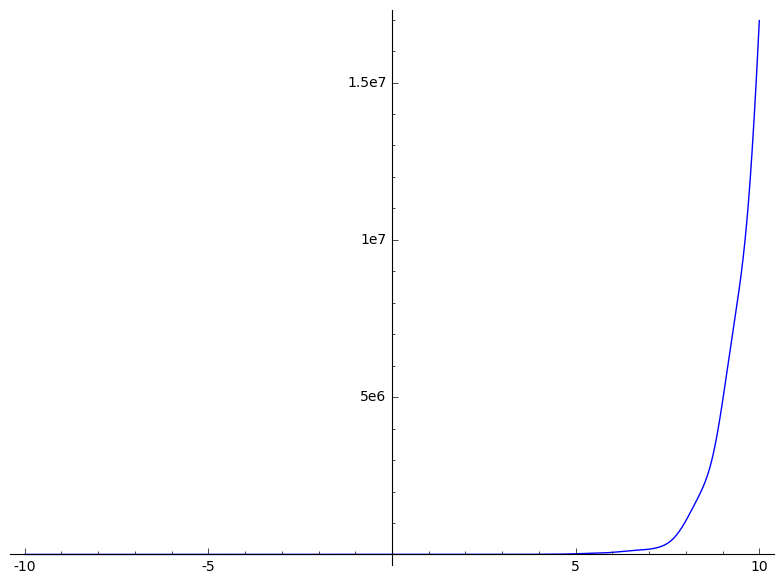

In [47]:
plot(lambda u: abs(mellin_integrand(exp(2*pi/sqrt(389)), 1/2 + u * I)), (-10, 10))

In [34]:
mellin_integrand(exp(2*pi/sqrt(389)), 1/2 + 1000 * I)

5.61591646231293e1337 + 1.28080071492565e1336*I

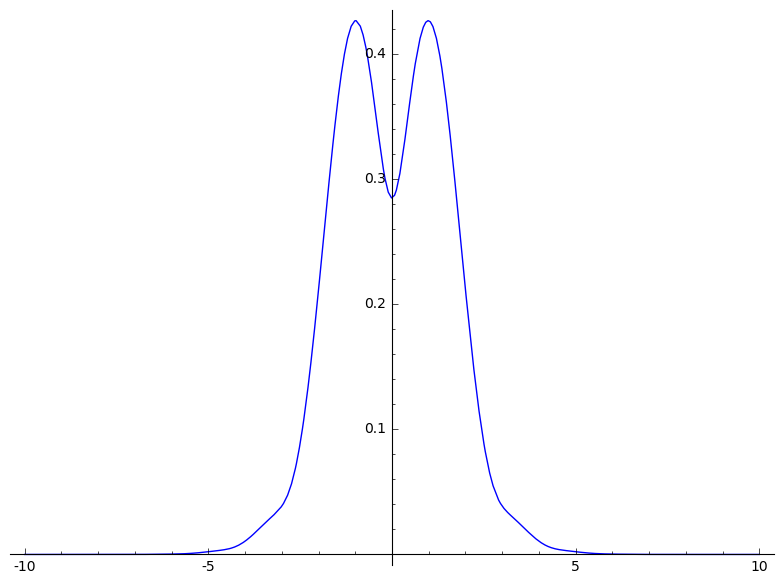

In [20]:
plot(lambda u: abs(mellin_integrand(.5, 1/2 + u * I)), (-10, 10))

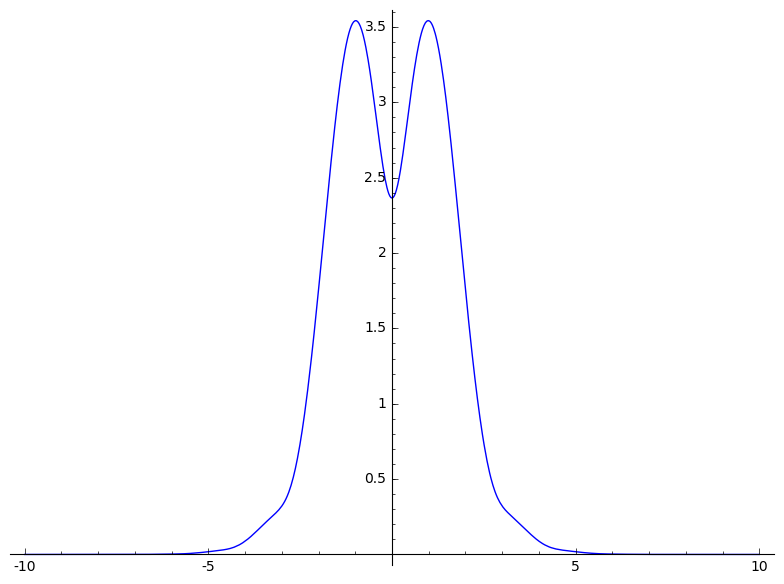

In [22]:
plot(lambda u: abs(mellin_integrand(.99, 1/2 + u * I)), (-10, 10))

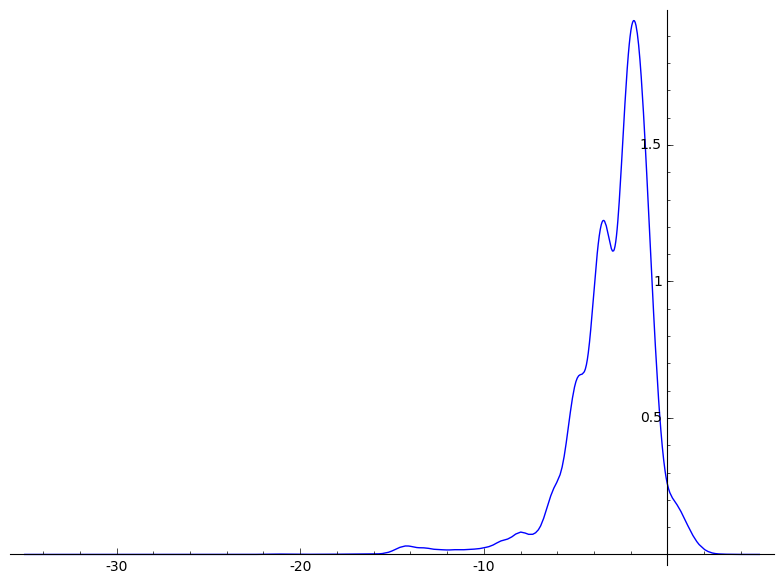

In [48]:
plot(lambda u: abs(mellin_integrand(0.5 + 0.5 * I, 1/2 + u * I)), (-35, 5))

In [34]:
mellin_integrand(-1, 1/2 + 1000 * I)

3.34063818830911e-710 + 3.55131893766132e-710*I

In [23]:
I_1 = lambda x, s: log(x)^(-s) * gamma(s) * L(s)
I_2 = lambda x, s: log(x)^(-(s + 1)) * gamma(s + 1) * L(s)

F_integrand = lambda s_1, s_2, x: CC((exp(-s_2*I*pi) - exp(-s_1*I*pi)) * I_1(x, s_1) * I_2(x, s_2))

In [24]:
F_integrand(1, 3.5, 0.5)

9.17531755742540e-18 - 9.17531755742539e-18*I

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose 1 (3762: plot.py, generate_plot_points) 
Unable to compute f(-14.0) (time = 99.753755)
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, 

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 17 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 16 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 15 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 14 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 13 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 12 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 11 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 10 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call_

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__

verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 8 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 8 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 9 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__) Warning: Loss of 8 decimal digits due to cancellation
verbose -1 (491: dokchitser.py, __call__

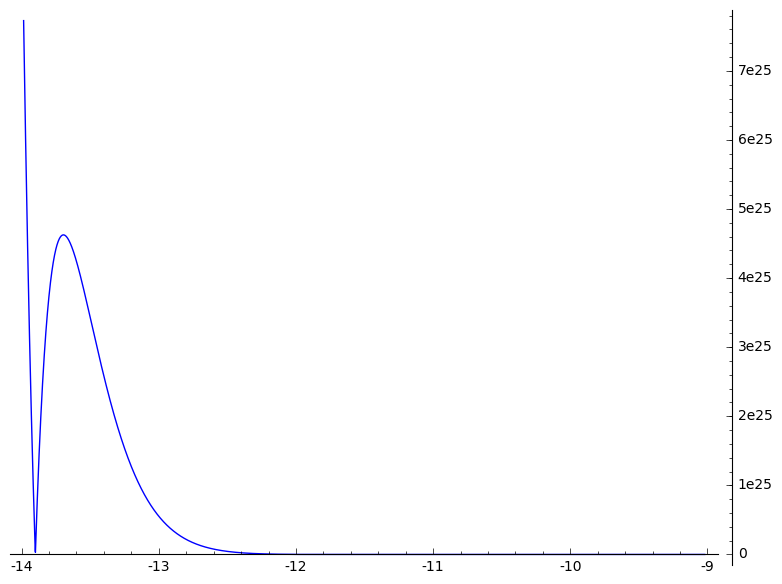

In [34]:
plot(lambda s: abs(F_integrand(0.1, s, 0.5)), -14, -9)